## Introduction to neural network classification with Tensorflow
A classification is where to try to classify whether something is one thing or another.
A few types of classification problems:
* Binary Classification
* Multiclass Classification
* Multilabel Classification


# Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles
# Make 1000 examples
n_samples = 1000
# Create circles
X,y = make_circles(n_samples,noise=0.03,random_state=42)


In [2]:
# Viewing features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
# This is a binary classification as the output is 0 or 1 
# We can check by visualizing the data

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], 'label':y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


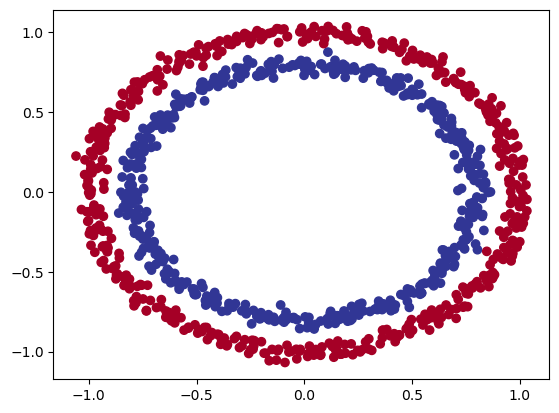

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and Output shapes

In [7]:
# Check the shapes of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
# How many samples are we working with
len(X),len(y)

(1000, 1000)

In [9]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [10]:
X[4],y[4]

(array([ 0.44220765, -0.89672343]), 0)

## Steps in modelling
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate


In [11]:
# Set the random seed
import tensorflow as tf
tf.random.set_seed(42)
# 1. Create the model using the Sequential API 
model_1 = tf.keras.Sequential([
    # tf.keras.Input(shape=())
    tf.keras.layers.Dense(1)
])
# 2. Compile the model
model_1.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X,y,epochs=5)

# 4. Evaluate the model
# model_1.evaluate()

2023-09-04 11:11:36.672083: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-04 11:11:36.690606: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2994485000 Hz
2023-09-04 11:11:36.691304: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x292c660 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2023-09-04 11:11:36.691352: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


Epoch 1/5
32/32 [==============================] - 0s 496us/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 408us/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 563us/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 392us/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 481us/step - loss: 0.6942 - accuracy: 0.4820


In [12]:
# improving our mode by training for longer
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 516us/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

### Just increasing the epochs the model is performing well so let's change and set things up a notch by adding an extra layer


In [13]:
# Set the random seed
tf.random.set_seed(42)
# Create the model with sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_2.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
# Fit the model
model_2.fit(X,y,epochs=200,verbose=0)
# Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 402us/step - loss: 0.6936 - accuracy: 0.5000


[0.6935999989509583, 0.5]

In [14]:
## Improve our model adding extra layer and increasing the neurons and changing the optimizer to Adam
# 1. Set random Seed
tf.random.set_seed(42)
# 2. Create the model using Sequential API
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(150,activation='relu'),
    tf.keras.layers.Dense(150,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# 3. Compile the model
model_3.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
# 4. Fit the model
model_3.fit(X,y,epochs=100,verbose=2)
# 5. Evaluate the model
model_3.evaluate(X,y)

Epoch 1/100
32/32 - 0s - loss: 0.6907 - accuracy: 0.5130
Epoch 2/100
32/32 - 0s - loss: 0.6816 - accuracy: 0.5410
Epoch 3/100
32/32 - 0s - loss: 0.6671 - accuracy: 0.5030
Epoch 4/100
32/32 - 0s - loss: 0.6444 - accuracy: 0.7110
Epoch 5/100
32/32 - 0s - loss: 0.6023 - accuracy: 0.7520
Epoch 6/100
32/32 - 0s - loss: 0.5321 - accuracy: 0.8770
Epoch 7/100
32/32 - 0s - loss: 0.4208 - accuracy: 0.9710
Epoch 8/100
32/32 - 0s - loss: 0.3025 - accuracy: 0.9910
Epoch 9/100
32/32 - 0s - loss: 0.2028 - accuracy: 1.0000
Epoch 10/100
32/32 - 0s - loss: 0.1354 - accuracy: 0.9990
Epoch 11/100
32/32 - 0s - loss: 0.1040 - accuracy: 0.9970
Epoch 12/100
32/32 - 0s - loss: 0.0769 - accuracy: 1.0000
Epoch 13/100
32/32 - 0s - loss: 0.0588 - accuracy: 0.9980
Epoch 14/100
32/32 - 0s - loss: 0.0456 - accuracy: 1.0000
Epoch 15/100
32/32 - 0s - loss: 0.0373 - accuracy: 1.0000
Epoch 16/100
32/32 - 0s - loss: 0.0307 - accuracy: 1.0000
Epoch 17/100
32/32 - 0s - loss: 0.0263 - accuracy: 1.0000
Epoch 18/100
32/32 - 0s

[0.0006262141396291554, 1.0]

# how to improve your model?
1. Set the random seed you can change it but it does not affect much
2. Creating a model -> add extra layers and change activation and neurons
3. compile the model -> change the optimizer and learning rate 
4. Fitting the model -> change the epochs 

# Visualize our predictions
* Take in a trained model, features(X) and labels(y)
* Create a meshgrid(numpy) of different X values
* Make predictions across the meshgrid
* Plot predictions as well as line between zones (where each class falls)

In [15]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


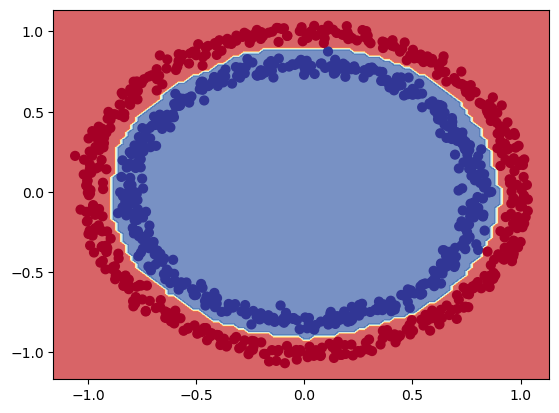

In [16]:
plot_decision_boundary(model_3,X,y)

# Inspect your data, then your model then your predictions (Visualize) if you do not understand what is going on!

In [17]:
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100,1100,5) # y = x+100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model on this data
# model_3.fit(tf.expand_dims(X_reg_train,axis=-1),y_reg_train,epochs=100)


# Since our model was trained on Binary Classification hence our loss was BinaryClassEntropy so now we change it totf.random.set_seed(42) mae 

In [18]:


## Improve our model adding extra layer and increasing the neurons and changing the optimizer to Adam
# 1. Set random Seed
tf.random.set_seed(42)
# 2. Create the model using Sequential API
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 3. Compile the model
model_4.compile(optimizer=tf.keras.optimizers.Adam(),loss=tf.keras.losses.mae,metrics=['mae'])
# 4. Fit the model
model_4.fit(X_reg_train,y_reg_train,epochs=100,verbose=2)
# 5. Evaluate the model
model_4.evaluate(X_reg_test,y_reg_test)

Epoch 1/100
5/5 - 0s - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 - 0s - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 - 0s - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 - 0s - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 - 0s - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 - 0s - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 - 0s - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 - 0s - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 - 0s - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 - 0s - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 - 0s - loss: 42.4797 - mae: 42.4797
Epoch 12/100
5/5 - 0s - loss: 41.5537 - mae: 41.5537
Epoch 13/100
5/5 - 0s - loss: 42.0972 - mae: 42.0972
Epoch 14/100
5/5 - 0s - loss: 41.8647 - mae: 41.8647
Epoch 15/100
5/5 - 0s - loss: 41.5342 - mae: 41.5342
Epoch 16/100
5/5 - 0s - loss: 41.4028 - mae: 41.4028
Epoch 17/100
5/5 - 0s - loss: 41.6887 - mae: 41.6887
Epoch 18/100
5/5 - 0s - loss: 41.6137 - mae: 41.6137
Epoch 19/100
5/5 - 0s - loss: 41.2796 - mae: 41.279

[57.8925895690918, 57.8925895690918]

In [19]:
y_reg_preds = model_4.predict(X_reg_test)
y_reg_preds

array([[ 886.9801 ],
       [ 892.83374],
       [ 898.6873 ],
       [ 904.541  ],
       [ 910.3945 ],
       [ 916.24786],
       [ 922.10156],
       [ 927.955  ],
       [ 933.8086 ],
       [ 939.66235],
       [ 945.51587],
       [ 951.3693 ],
       [ 957.223  ],
       [ 963.0765 ],
       [ 968.93005],
       [ 974.7836 ],
       [ 980.6372 ],
       [ 986.49084],
       [ 992.3444 ],
       [ 998.19794],
       [1004.05145],
       [1009.90497],
       [1015.75867],
       [1021.6122 ],
       [1027.4658 ],
       [1033.3193 ],
       [1039.1731 ],
       [1045.0267 ],
       [1050.8801 ],
       [1056.7336 ],
       [1062.5872 ],
       [1068.4408 ],
       [1074.2944 ],
       [1080.1481 ],
       [1086.0016 ],
       [1091.8549 ],
       [1097.7086 ],
       [1103.5621 ],
       [1109.4158 ],
       [1115.2694 ],
       [1121.1229 ],
       [1126.9766 ],
       [1132.83   ],
       [1138.6837 ],
       [1144.5372 ],
       [1150.3909 ],
       [1156.2443 ],
       [1162.

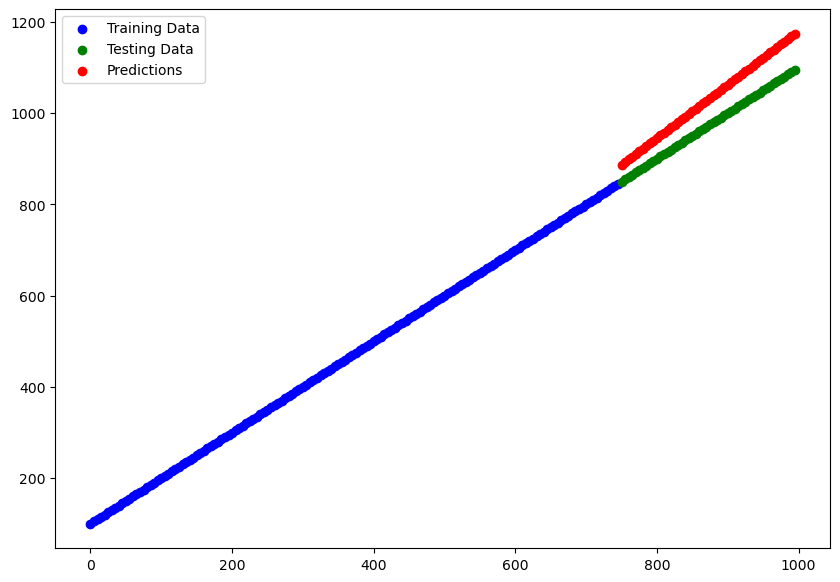

In [20]:
# Plot our model's predicton 
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train,y_reg_train,c='b',label='Training Data')
plt.scatter(X_reg_test,y_reg_test,c='g',label='Testing Data')
plt.scatter(X_reg_test,y_reg_preds,c='r',label='Predictions')
plt.legend()

### The missing piece Non-Linearity


# Creting a model based on Tensorflow Playground with the following:
* 1 layer with 1 neuron and  Activation of linear
* Binary CrossEntropy with Adam optimizer on learning rate 0.001
* Fit the model on X and y with 100 epochs using history variable to get the loss rate graph 

In [21]:
# set the random seed
tf.random.set_seed(42)
# Initialize the model with Sequential API
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation='linear')
])
# Compile the model 
model_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy', metrics=['accuracy'])
# Fit the model with history variable
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 642us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 682us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 572us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 401us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 604us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 665us/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 477us/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 693us/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 734us/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 579us/step - loss: 3.7419 - accura

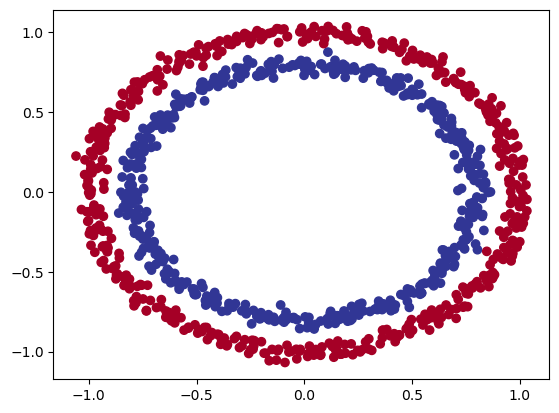

In [22]:
# Check our data
plt.scatter(X[:,0], X[:,1], c=y,cmap=plt.cm.RdYlBu); # You can read more about cmap and c=y means colour changes along y

doing binary classifcation...


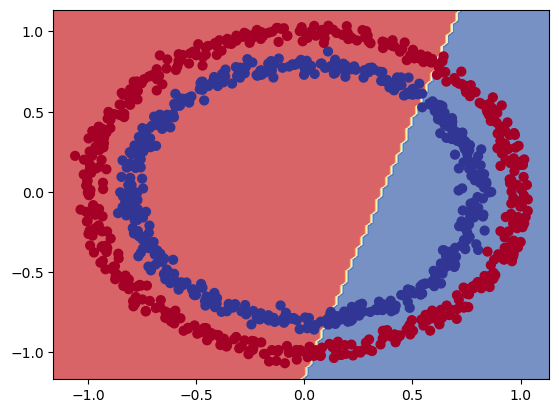

In [23]:
# Check decision boundary for model_5
plot_decision_boundary(model_5,X,y) # Red is anything in that area is 0 and Blue is anything in the area is 1 and yellow thin line means in that area it can be anything red or blue

In [24]:
# Let's change the activation to 'ReLu'
# set the random seed
tf.random.set_seed(42)
# Initialize the model with Sequential API
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])
# Compile the model 
model_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy', metrics=['accuracy'])
# Fit the model with history variable
history = model_5.fit(X,y,epochs=100)


Epoch 1/100
32/32 [==============================] - 0s 527us/step - loss: 4.2979 - accuracy: 0.4670
Epoch 2/100
32/32 [==============================] - 0s 461us/step - loss: 4.2317 - accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 0s 499us/step - loss: 4.1610 - accuracy: 0.4310
Epoch 4/100
32/32 [==============================] - 0s 496us/step - loss: 4.1183 - accuracy: 0.4270
Epoch 5/100
32/32 [==============================] - 0s 536us/step - loss: 4.0784 - accuracy: 0.4240
Epoch 6/100
32/32 [==============================] - 0s 748us/step - loss: 3.9642 - accuracy: 0.4180
Epoch 7/100
32/32 [==============================] - 0s 527us/step - loss: 3.8626 - accuracy: 0.4100
Epoch 8/100
32/32 [==============================] - 0s 804us/step - loss: 3.8123 - accuracy: 0.4160
Epoch 9/100
32/32 [==============================] - 0s 633us/step - loss: 3.7802 - accuracy: 0.4170
Epoch 10/100
32/32 [==============================] - 0s 627us/step - loss: 3.7419 - accura

doing binary classifcation...


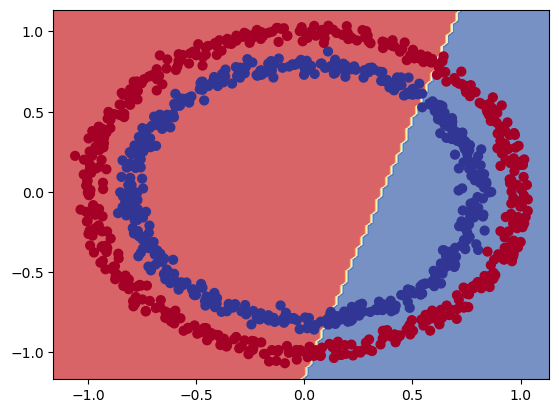

In [25]:
# Plotting Decision Boundary for model_5 again
plot_decision_boundary(model_5,X,y)

In [26]:
# set the random seed
tf.random.set_seed(42)
# Initialize the model with Sequential API
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(100,activation='relu'),
    tf.keras.layers.Dense(1)
])
# Compile the model 
model_5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy', metrics=['accuracy'])
# Fit the model with history variable
history = model_5.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8880 - accuracy: 0.3230
Epoch 2/100
32/32 [==============================] - 0s 960us/step - loss: 0.7776 - accuracy: 0.2870
Epoch 3/100
32/32 [==============================] - 0s 933us/step - loss: 0.7621 - accuracy: 0.3460
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7442 - accuracy: 0.3050
Epoch 5/100
32/32 [==============================] - 0s 770us/step - loss: 0.7227 - accuracy: 0.4090
Epoch 6/100
32/32 [==============================] - 0s 776us/step - loss: 0.6909 - accuracy: 0.5140
Epoch 7/100
32/32 [==============================] - 0s 671us/step - loss: 0.6234 - accuracy: 0.6820
Epoch 8/100
32/32 [==============================] - 0s 806us/step - loss: 0.4988 - accuracy: 0.8170
Epoch 9/100
32/32 [==============================] - 0s 591us/step - loss: 0.2582 - accuracy: 0.9750
Epoch 10/100
32/32 [==============================] - 0s 791us/step - loss: 0.0696 - accuracy: 

In [27]:
# Another model with 2 layers and 4 neurons and relu activation 
# Create a random seed
tf.random.set_seed(42)
# Create the model with Sequential API
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1)
])
# Compile the model
model_6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
# Fit the model
history  = model_6.fit(X,y,epochs=100)


Epoch 1/100
32/32 [==============================] - 0s 597us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 523us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 520us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 518us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 503us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 531us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 451us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 489us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 562us/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 654us/step - loss: 7.7125 - accura

In [28]:
# Evaluate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 428us/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classifcation...


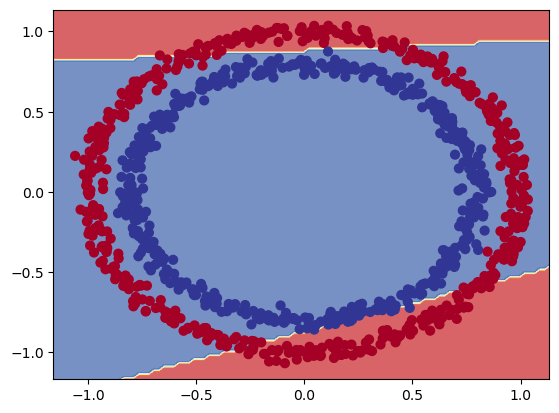

In [29]:
# How does model prediction boundary look?
plot_decision_boundary(model_6,X,y)

### We do not have the activation for our model for output
 

In [30]:
# Set the random seed
tf.random.set_seed(42)
# Create the model with sequential API
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])
# Compile the model
model_7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])
# Fit the model
history = model_7.fit(X,y,epochs=100)


Epoch 1/100
32/32 [==============================] - 0s 578us/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 589us/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 586us/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 634us/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 686us/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 473us/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 601us/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 452us/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 477us/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 513us/step - loss: 0.6766 - accura

doing binary classifcation...


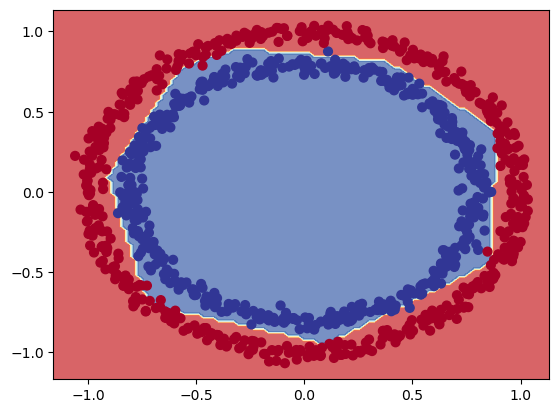

In [31]:
# Visualize boundary
plot_decision_boundary(model_7,X,y)

In [32]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

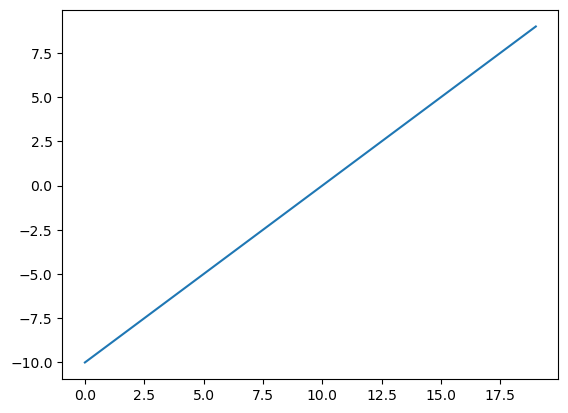

In [33]:
# Visualize our toy tensor
plt.plot(A)

In [34]:
# How if we apply our sigmoid function directly to our toy tensor?
# Sigmoid  = 1/1+e^(-x)
sig_A = tf.keras.activations.sigmoid(A)
sig_A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5399931e-05, 1.2341142e-04, 3.3542514e-04, 9.1102719e-04,
       2.4726391e-03, 6.6928566e-03, 1.7986238e-02, 4.7425866e-02,
       1.1920291e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079709e-01, 9.5257413e-01, 9.8201376e-01, 9.9330711e-01,
       9.9752736e-01, 9.9908900e-01, 9.9966455e-01, 9.9987662e-01],
      dtype=float32)>

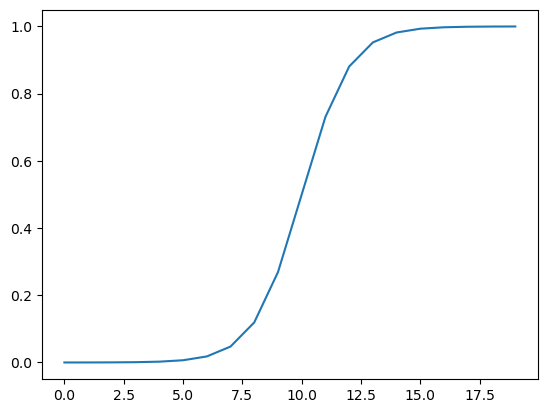

In [35]:
# Since we do not understand much of what these value represent (except the e's) how about we visualize it.
# Also note that the values include 'e' so there has to be a curve as of any e^x does have a curve.
plt.plot(sig_A)

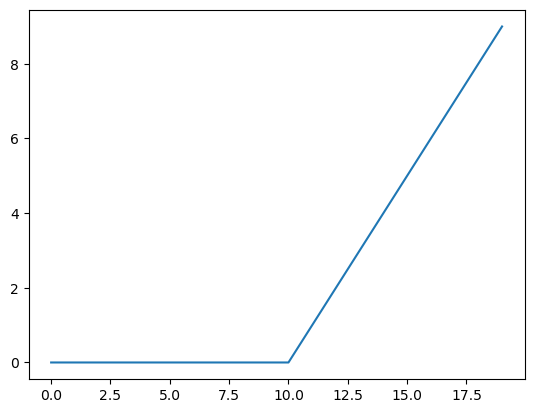

In [36]:
# And yay we get a curve so that how `model_7` is getting that curve and other models do not is the reason of this sigmoid function
# But model_7 still has straight lines innit? Yes and for that let's visualize our next activation i.e. 'relu' 
# The formula is relu = tf.maximum(0,x) means negative turns to 0 and return the rest positives with it
# So yeah the straight lines around the curve are coming from this relu (In model_7 between 0.5-1.0 curve)
rel_A = tf.keras.activations.relu(A)
plt.plot(rel_A)

In [37]:
# Let's use the activation linear too it does not do anything just replicates the tensor
lin_A = tf.keras.activations.linear(A)
lin_A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

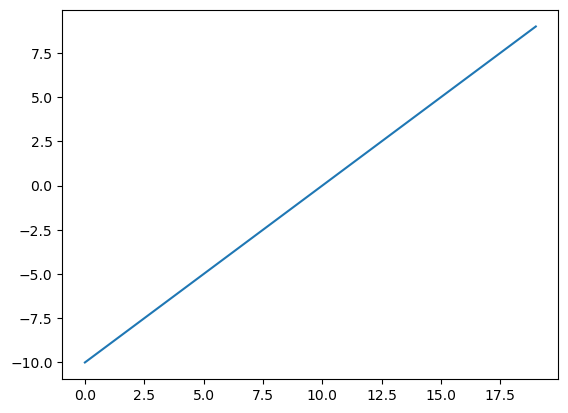

In [38]:
# Visualizing the lin_A 
plt.plot(lin_A)

## Evaluating and improving our classification model

In [39]:
# Let's create train and test split
X_train = X[:800] 
X_test = X[800:]
y_train = y[:800]
y_test = y[800:]
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [40]:
# Let's create our model to fit on our traning data and then fit our model on test
# Set the random seed
tf.random.set_seed(42)
# Initiate the model with Sequential API
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# Compile our model
model_8.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # Higher the learning rate faster the model improves
                loss=tf.keras.losses.BinaryCrossentropy(),
                metrics=['accuracy'])
# Fit the model on training data
history = model_8.fit(X_train,y_train,epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 705us/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 549us/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 477us/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 755us/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 492us/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 383us/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 602us/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 558us/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 484us/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 559us/step - loss: 0.5714 - accuracy: 0.7738

In [41]:
model_8.evaluate(X_test,y_test)

7/7 [==============================] - 0s 670us/step - loss: 0.1247 - accuracy: 1.0000


[0.12468847632408142, 1.0]

doing binary classifcation...
doing binary classifcation...


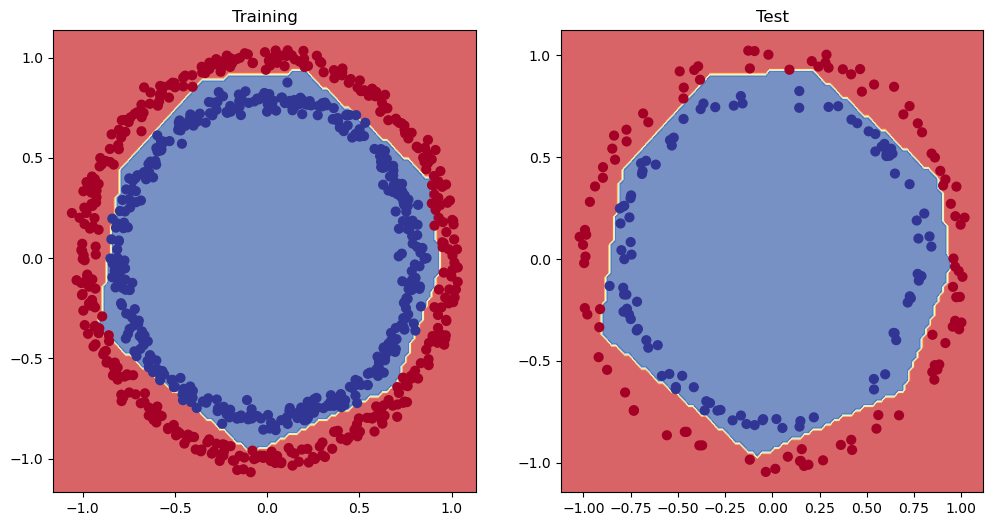

In [42]:
# Let's plot our data
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Training')
plot_decision_boundary(model_8,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_8,X_test,y_test)
plt.show();

### Plot our loss (or Traning) Curves

In [43]:
hist = pd.DataFrame(history.history)
hist

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


Text(0.5, 1.0, 'Model_8 loss curve')

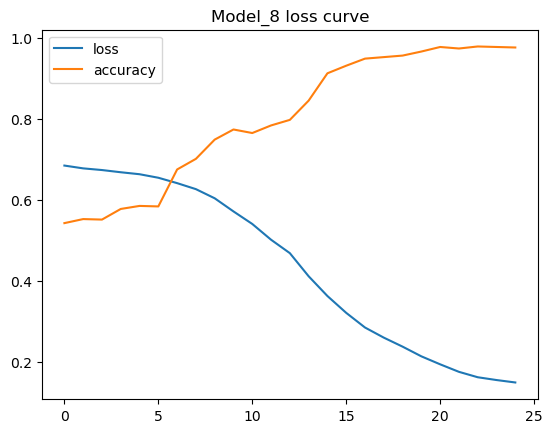

In [44]:
hist.plot()
plt.title('Model_8 loss curve')

# Finding the Best Learning Rate
### To find the best learning rate ( the rate at which the loss decreases the most)
* A learning CallBack rate **callback** 
* Another Model
* A modified loss curve plo

In [45]:
# Set random seed
tf.random.set_seed(42)
# Create model same as model_8
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
model_9.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),loss='binary_crossentropy',metrics=['accuracy'])
# Setting up a callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
history = model_9.fit(X_train,
                      y_train,
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 0s 531us/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 455us/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 476us/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 428us/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 478us/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 412us/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 523us/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 493us/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 527us/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 542us/step - loss: 0.6871 - accura

In [46]:
# Checkout the history
history_m9 = pd.DataFrame(history.history)
history_m9

,loss,accuracy,lr
0,0.694489,0.49875,0.000100
1,0.693771,0.49750,0.000112
2,0.693004,0.49625,0.000126
3,0.692244,0.49750,0.000141
4,0.691439,0.50625,0.000158
...,...,...,...
95,0.784561,0.46125,5.623413
96,0.806998,0.50125,6.309574
97,0.964402,0.49625,7.079458
98,0.966809,0.49125,7.943282


<AxesSubplot:xlabel='epochs'>

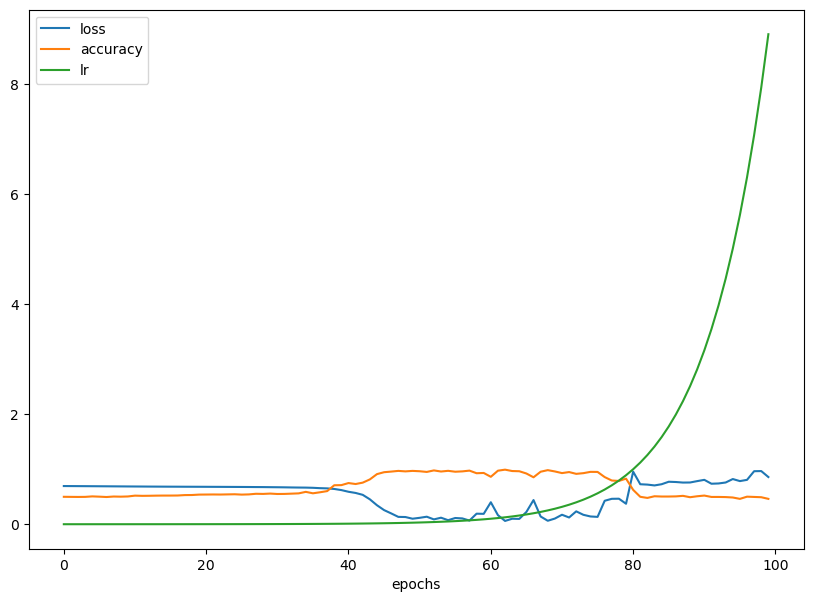

In [47]:
history_m9.plot(figsize=(10,7),xlabel='epochs')

In [51]:
# Plot Learning rate with loss
lrs = 1e-4 * (tf.range(100)/20)
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([0.00e+00, 5.00e-06, 1.00e-05, 1.50e-05, 2.00e-05, 2.50e-05,
       3.00e-05, 3.50e-05, 4.00e-05, 4.50e-05, 5.00e-05, 5.50e-05,
       6.00e-05, 6.50e-05, 7.00e-05, 7.50e-05, 8.00e-05, 8.50e-05,
       9.00e-05, 9.50e-05, 1.00e-04, 1.05e-04, 1.10e-04, 1.15e-04,
       1.20e-04, 1.25e-04, 1.30e-04, 1.35e-04, 1.40e-04, 1.45e-04,
       1.50e-04, 1.55e-04, 1.60e-04, 1.65e-04, 1.70e-04, 1.75e-04,
       1.80e-04, 1.85e-04, 1.90e-04, 1.95e-04, 2.00e-04, 2.05e-04,
       2.10e-04, 2.15e-04, 2.20e-04, 2.25e-04, 2.30e-04, 2.35e-04,
       2.40e-04, 2.45e-04, 2.50e-04, 2.55e-04, 2.60e-04, 2.65e-04,
       2.70e-04, 2.75e-04, 2.80e-04, 2.85e-04, 2.90e-04, 2.95e-04,
       3.00e-04, 3.05e-04, 3.10e-04, 3.15e-04, 3.20e-04, 3.25e-04,
       3.30e-04, 3.35e-04, 3.40e-04, 3.45e-04, 3.50e-04, 3.55e-04,
       3.60e-04, 3.65e-04, 3.70e-04, 3.75e-04, 3.80e-04, 3.85e-04,
       3.90e-04, 3.95e-04, 4.00e-04, 4.05e-04, 4.10e-04, 4.15e-04,
       4.20e-0

Text(0.5, 1.0, 'Learning Rate vs Loss')

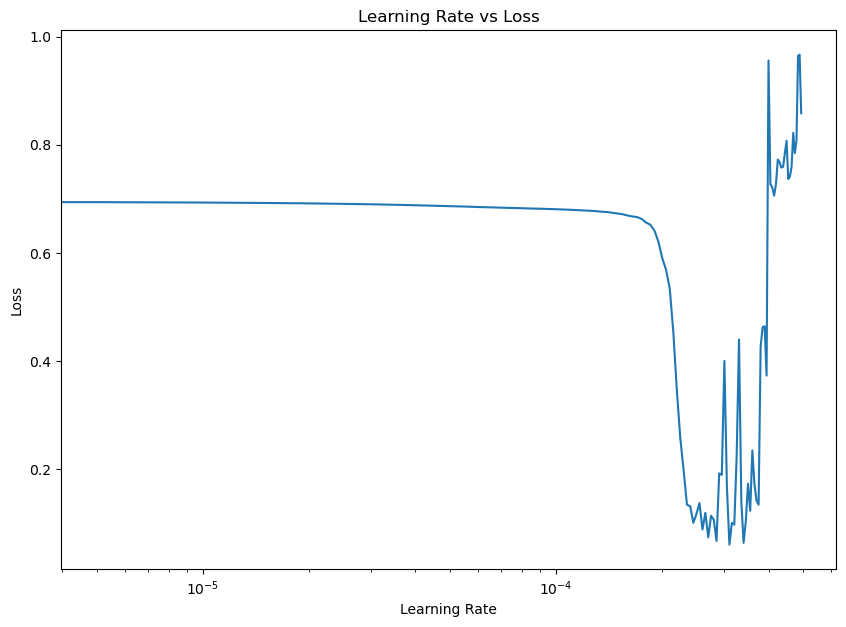

In [53]:
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_m9['loss'])
plt.xlabel('Learning Rate')
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")


In [60]:
# Preparing the model_9 with lr of 0.02
# Set random seed
tf.random.set_seed(42)
# Instantiate model with Sequential API
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])
# compile the model
model_10.compile(optimizer=tf.keras.optimizers.Adam(lr=0.02),loss='binary_crossentropy',metrics=['accuracy'])
# Set the call back
# lr_scheduler_10 = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*10**(epoch/20)
# Fit the model
history_10 = model_10.fit(X_train,y_train,epochs=20)

Epoch 1/20
25/25 [==============================] - 0s 519us/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 479us/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 512us/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 519us/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 398us/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 458us/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 415us/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 421us/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 426us/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 427us/step - loss: 0.2512 - accuracy: 0.9500

In [62]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 645us/step - loss: 0.0574 - accuracy: 0.9900


[0.05740182474255562, 0.9900000095367432]

doing binary classifcation...
doing binary classifcation...


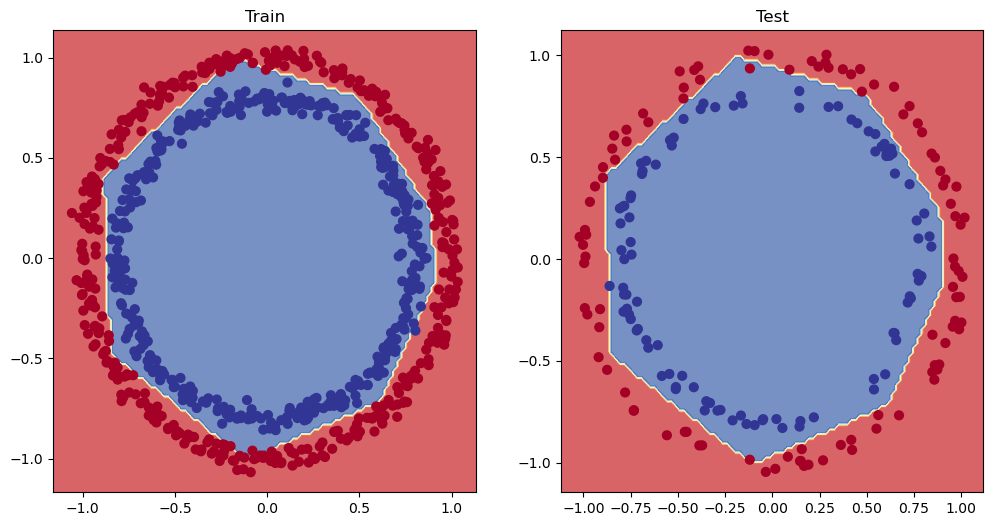

In [63]:
# Plot training and test data boundary plot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_10,X_train,y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10,X_test,y_test)

 # Classification Evaluation Metrics:
 * Accuracy: tf.keras.metrics.Accuracy() or sklearn.metrics.accuracy_score() |
 * Precision: tf.keras.metrics.Precision() or sklearn.metrics.precision_score() | High Precision Less False Positives
 * Recall: tf.keras.metrics.Recall() or sklearn.metrics.recall_score() | High recall Less False Negatives
 * F1-score: tf.keras.metrics.Accuracy() or sklearn.metrics.f1_score() | Harmonic Mean of Precision and Recall
 * Confusion Matrix: Custom Function  or sklearn.metrics.confusion_matrix() | Can be har with large number of classes
  * Scikit-Learn Classification report
## Precision and Recall Tradeoff


* False Positive ->
* False Negative -> 
* True Positive -> 
* True Negative ->

In [66]:
# Since we trained our model on accuracy metrics let's check the accuracy
loss, accuracy = model_10.evaluate(X_test,y_test)
print(f'Loss on test data: {loss:.4f}')
print(f'Accuracy on test data: {accuracy*100:.2f}')

7/7 [==============================] - 0s 499us/step - loss: 0.0574 - accuracy: 0.9900
Loss on test data: 0.0574
Accuracy on test data: 99.00


# How about a confusion Matrix?

In [67]:
from sklearn.metrics import confusion_matrix

# Make Predictions
y_preds = model_10.predict(X_test)

# Create a Confusion Matrix
# confusion_matrix(y_test,y_preds)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [70]:
# Looks like our y_preds has come out in **prediction probablity** form... standard output from the sigmoid ( or softmax) activation function 
y_test[:10],y_preds[:10]

(array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0]),
 array([[9.8526537e-01],
        [9.9923790e-01],
        [9.9032342e-01],
        [9.9706948e-01],
        [3.9622900e-01],
        [1.8126905e-02],
        [9.6829069e-01],
        [1.9746691e-02],
        [9.9967158e-01],
        [5.6460500e-04]], dtype=float32))

In [72]:
y_preds = tf.cast(tf.round(y_preds),tf.int32)
y_preds

<tf.Tensor: shape=(200, 1), dtype=int32, numpy=
array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
    

In [73]:
# So our y_preds is in the same form as our y_test let's create a confusion matrix
confusion_matrix(y_test,y_preds)

array([[99,  2],
       [ 0, 99]])

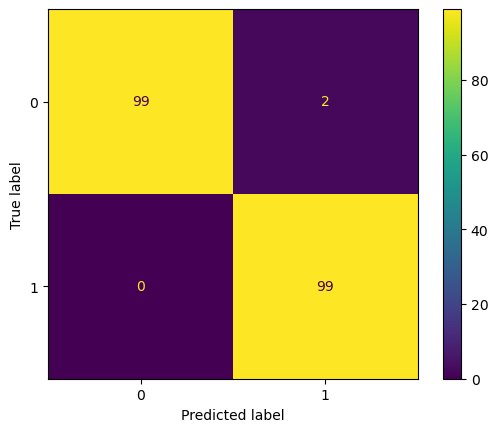

In [75]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix(y_test,y_preds)).plot()

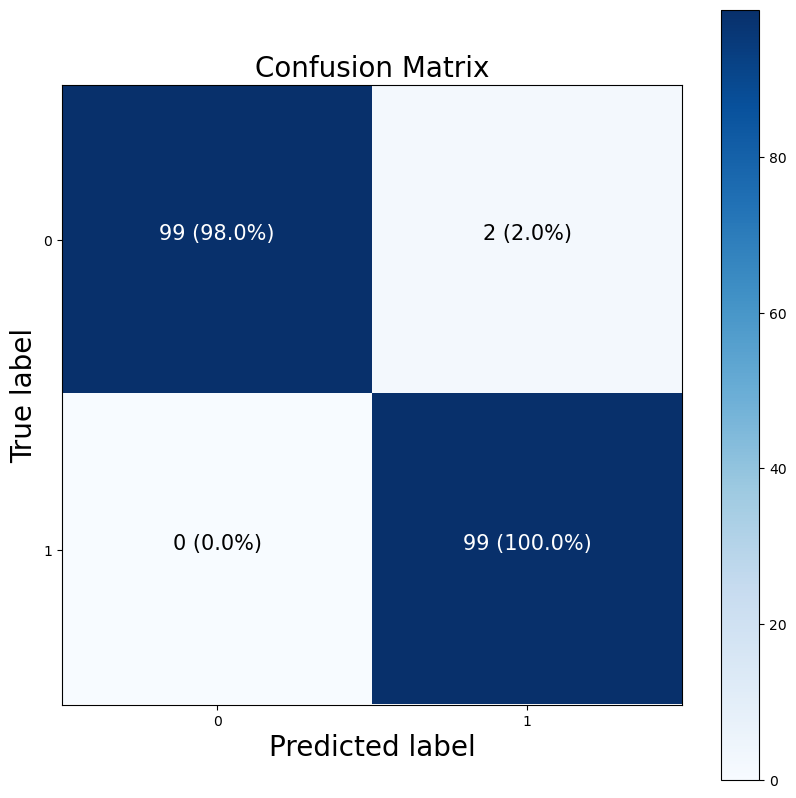

In [77]:
def my_plot_confusionmatrix(y_true=y_test,y_preds=y_preds):
    # Note: The following confusion matrix code is a remix of Scikit-Learn's 
    # plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
    # and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
    import itertools
    
    figsize = (10, 10)
    
    # Create the confusion matrix
    cm = confusion_matrix(y_test, tf.round(y_preds))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]
    
    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
    fig.colorbar(cax)
    
    # Create classes
    classes = False
    
    if classes:
      labels = classes
    else:
      labels = np.arange(cm.shape[0])
    
    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes),
           yticks=np.arange(n_classes),
           xticklabels=labels,
           yticklabels=labels)
    
    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    # Adjust label size
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.title.set_size(20)
    
    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.
    
    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
               horizontalalignment="center",
               color="white" if cm[i, j] > threshold else "black",
               size=15)
my_plot_confusionmatrix()

## Working with a larger example (or a multiclass classification)

In [65]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data is already split into train and test set
(train_data,train_label),(test_data,test_label) = fashion_mnist.load_data()

In [66]:
# Show the first training sample
print(f'Training sample:\n{train_data[0]}')
print(f'Training label:\n{train_label[0]}')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [67]:
# Shape of Single Example
train_data.shape, train_label.shape

((60000, 28, 28), (60000,))

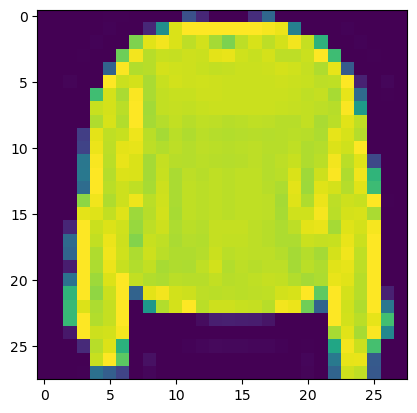

In [68]:
# How does our sample look like plotting it
import matplotlib.pyplot as plt
plt.imshow(train_data[0])
plt.imshow(train_data[7]);

In [69]:
# Check the label of 7
train_label[7], train_label.dtype

(2, dtype('uint8'))

In [70]:
# So these labels aren't helping I mean I can't understand what 2 means so let's check the github and see what the labels stand for
labels_name = {0:"T-shirt/top",
1: "Trouser",
2 :"Pullover",
3 :"Dress",
4 :"Coat",
5 :"Sandal",
6 :"Shirt",
7 :"Sneaker",
8 :"Bag",
9 :"Ankle boot"}
labels_name[2]

'Pullover'

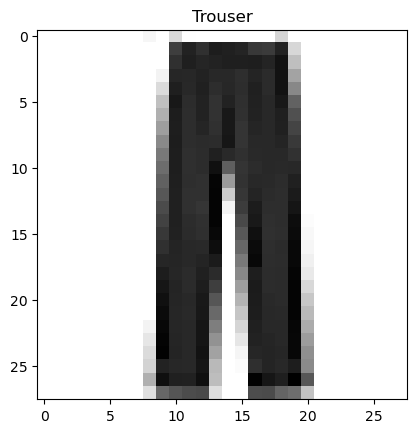

In [71]:
def show_label(index):
    plt.imshow(train_data[index],cmap=plt.cm.binary)
    plt.title( labels_name[train_label[index]])
show_label(143)

In [72]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [73]:
len(class_names)

10

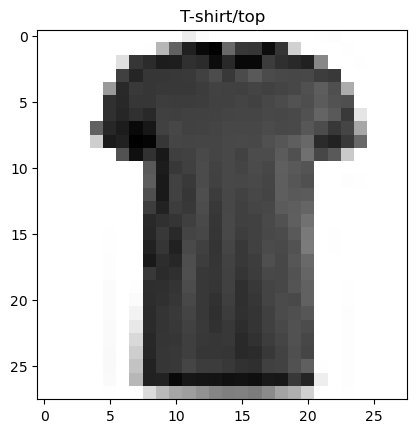

In [74]:
show_label(17)

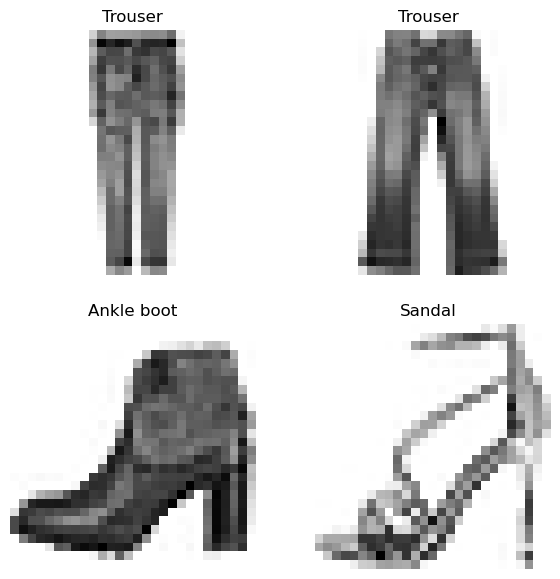

In [75]:
# Plot Multiple random images from Fashion MNIST
# def know_ur_data()
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index],cmap=plt.cm.binary)
    plt.title(class_names[train_label[rand_index]])
    plt.axis(False)

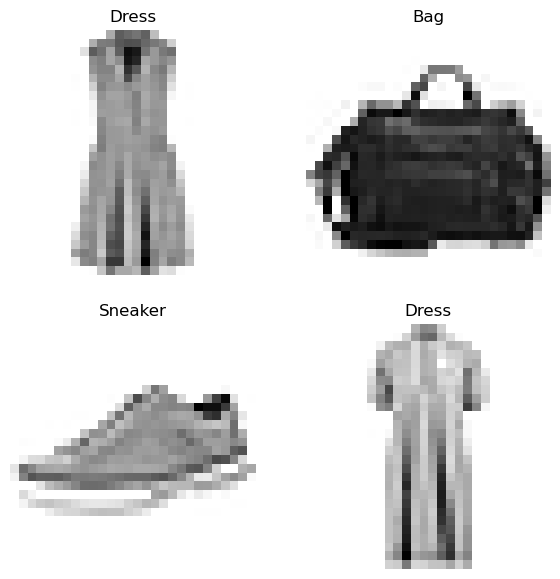

In [76]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_label[rand_index]])
  plt.axis(False)

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The input shape will have to deal with 28x28 tensors (the height and width of our images).
We're actually going to squash the input into a tensor (vector) of shape (784).
* The output shape will have to be 10 because we need our model to predict for 10 different classes.
* We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
* We'll need to change our loss function from a binary loss function to a multiclass loss function.
More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
* We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

In [77]:
tf.random.set_seed(42)
model_11 = tf.keras.Sequential([
    # Must add a flatten layer to remove the shape error that changes our shape of 28*28 to one long vector of None,784
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax),
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Loss function of out put is not one-hot encoded i.e. it needs SparseCrossEntropy
                 metrics=['accuracy'],
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

non_norm_hist_11 = model_11.fit(train_data,
                                train_label,
                                epochs=25,
                                validation_data=(test_data,test_label))

Epoch 1/25
1875/1875 [==============================] - 2s 970us/step - loss: 2.3443 - accuracy: 0.1011 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 2/25
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3040 - accuracy: 0.0976 - val_loss: 2.3048 - val_accuracy: 0.1000
Epoch 3/25
1875/1875 [==============================] - 2s 928us/step - loss: 2.3040 - accuracy: 0.0993 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 4/25
1875/1875 [==============================] - 2s 981us/step - loss: 2.3040 - accuracy: 0.0998 - val_loss: 2.3043 - val_accuracy: 0.1000
Epoch 5/25
1875/1875 [==============================] - 2s 906us/step - loss: 2.3039 - accuracy: 0.0998 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 6/25
1875/1875 [==============================] - 2s 920us/step - loss: 2.3039 - accuracy: 0.1002 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 7/25
1875/1875 [==============================] - 2s 947us/step - loss: 2.3040 - accuracy: 0.0978 - val_loss: 2.3031 - v

In [78]:
model_11.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 3140      
_________________________________________________________________
dense_23 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_24 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [79]:
# Check the min and max values of our training data
train_data.min(),train_data.max()

(0, 255)

In [80]:
# To normalize our data we need to divide the data by 255
# Neural networks prefer data between 0 and 1 or process is called normalization or scaling of data
train_data_norm,test_data_norm = train_data/255,test_data/255

In [83]:
train_data_norm.min(),train_data_norm.max(),test_data.min(),test_data.max()

(0.0, 1.0, 0, 255)

In [84]:
tf.random.set_seed(42)
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
model_12.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics=['accuracy'])
norm_hist_model_12 = model_12.fit(train_data_norm,train_label,
             epochs=25,
             validation_data=(test_data_norm,test_label))

Epoch 1/25
1875/1875 [==============================] - 2s 895us/step - loss: 1.0987 - accuracy: 0.5718 - val_loss: 0.9617 - val_accuracy: 0.6553
Epoch 2/25
1875/1875 [==============================] - 2s 926us/step - loss: 0.8661 - accuracy: 0.6932 - val_loss: 0.8452 - val_accuracy: 0.7093
Epoch 3/25
1875/1875 [==============================] - 2s 885us/step - loss: 0.8399 - accuracy: 0.7001 - val_loss: 0.8149 - val_accuracy: 0.7089
Epoch 4/25
1875/1875 [==============================] - 2s 839us/step - loss: 0.8276 - accuracy: 0.7054 - val_loss: 0.8251 - val_accuracy: 0.7037
Epoch 5/25
1875/1875 [==============================] - 2s 868us/step - loss: 0.8201 - accuracy: 0.7060 - val_loss: 0.9053 - val_accuracy: 0.6706
Epoch 6/25
1875/1875 [==============================] - 2s 871us/step - loss: 0.8157 - accuracy: 0.7085 - val_loss: 0.8032 - val_accuracy: 0.7090
Epoch 7/25
1875/1875 [==============================] - 2s 858us/step - loss: 0.8051 - accuracy: 0.7094 - val_loss: 0.9451 -

<AxesSubplot:title={'center':'Normalised'}>

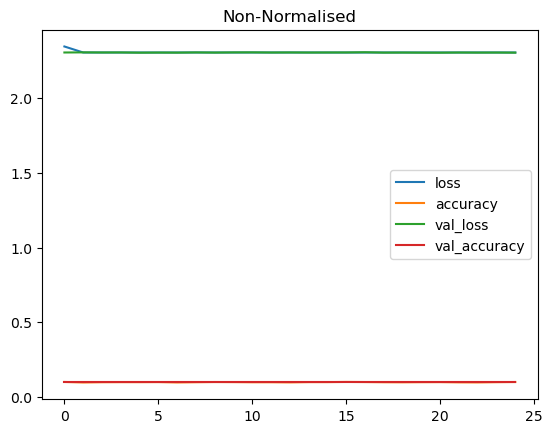

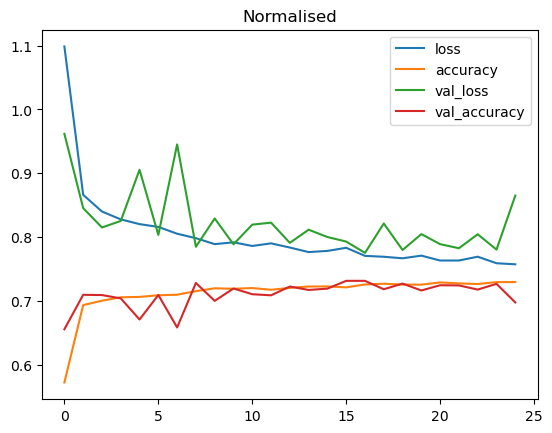

In [86]:
# Plotting the history curves
import pandas as pd
# fig, axs = plt.subplots(1,2,figsize=(10,7))
# axs[0].plot(pd.DataFrame(non_norm_hist_11.history))
# axs[1].plot(pd.DataFrame(norm_hist_model_12.history))

pd.DataFrame(non_norm_hist_11.history).plot(title="Non-Normalised")
pd.DataFrame(norm_hist_model_12.history).plot(title="Normalised")

## Finding an Ideal Learning Rate

In [87]:
# Create a model with callback to find ideal learning rate
tf.random.set_seed(42)
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
model_13.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics=['accuracy'])
lr_scheduler_fashion = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
find_lr_history = model_13.fit(train_data_norm,train_label,
             epochs=50,
             validation_data=(test_data_norm,test_label),
             callbacks=[lr_scheduler_fashion])


Epoch 1/50
1875/1875 [==============================] - 2s 952us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/50
1875/1875 [==============================] - 2s 934us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/50
1875/1875 [==============================] - 2s 909us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/50
1875/1875 [==============================] - 2s 915us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/50
1875/1875 [==============================] - 2s 997us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/50
1875/1875 [==============================] - 2s 897us/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - v

Text(0.5, 1.0, 'Find Ideal Learning Rate')

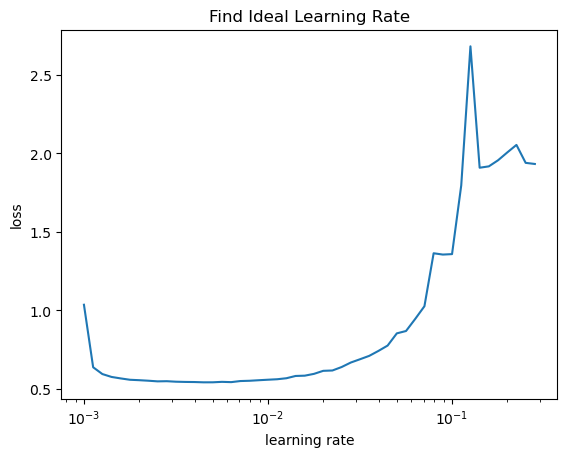

In [91]:
# Plotting the lr_history semilogx
import numpy as np
# To find lrs as 50 epoch so 1e-3* 10**(np.arange(50)/20)
lrs = 1e-3 * 10**(np.arange(50)/20)
plt.semilogx(lrs,find_lr_history.history['loss'],) # X-axis is converted into log x
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('Find Ideal Learning Rate')

In [92]:
# The minimum occurs near to 0.001 let's try this learning rate out as 0.002
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(4,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
model_14.compile(optimizer=tf.keras.optimizers.Adam(lr=0.002),
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 metrics=['accuracy'])
model_14.fit(train_data_norm,train_label,
             epochs=50,
             validation_data=(test_data_norm,test_label))

Epoch 1/50
1875/1875 [==============================] - 2s 882us/step - loss: 0.9536 - accuracy: 0.6663 - val_loss: 0.7201 - val_accuracy: 0.7491
Epoch 2/50
1875/1875 [==============================] - 2s 822us/step - loss: 0.6830 - accuracy: 0.7672 - val_loss: 0.6786 - val_accuracy: 0.7653
Epoch 3/50
1875/1875 [==============================] - 2s 833us/step - loss: 0.6430 - accuracy: 0.7807 - val_loss: 0.6689 - val_accuracy: 0.7693
Epoch 4/50
1875/1875 [==============================] - 2s 822us/step - loss: 0.6204 - accuracy: 0.7866 - val_loss: 0.6523 - val_accuracy: 0.7713
Epoch 5/50
1875/1875 [==============================] - 2s 821us/step - loss: 0.6054 - accuracy: 0.7915 - val_loss: 0.6311 - val_accuracy: 0.7777
Epoch 6/50
1875/1875 [==============================] - 1s 788us/step - loss: 0.5940 - accuracy: 0.7947 - val_loss: 0.6258 - val_accuracy: 0.7769
Epoch 7/50
1875/1875 [==============================] - 2s 840us/step - loss: 0.5848 - accuracy: 0.7988 - val_loss: 0.6146 -

# Now we've a model up and running now we can do
* Evaluate its performance using other classification metrics (such as a confusion matrix or classification report).
* Assess some of its predictions (through visualizations).
* Improve its accuracy (by training it for longer or changing the architecture).
* Save and export it for use in an application.


In [95]:
# Let's start with confusion matrix
# We need some predictions for our c_matrix
y_probs = model_14.predict(test_data_norm)
y_probs

array([[3.2637196e-14, 4.8930109e-09, 3.7465011e-25, ..., 4.6290223e-02,
        6.0889979e-05, 6.7327124e-01],
       [1.1178664e-04, 2.6623750e-08, 6.1404169e-01, ..., 1.3488970e-30,
        7.1397278e-04, 1.6219369e-15],
       [4.6982088e-05, 9.9615449e-01, 3.2361471e-03, ..., 4.9355041e-22,
        1.8433049e-05, 1.5843748e-11],
       ...,
       [1.9382041e-02, 3.0782267e-06, 1.3139510e-03, ..., 4.0975323e-05,
        9.5111716e-01, 4.1251781e-07],
       [7.1085151e-04, 9.8056084e-01, 7.3981397e-03, ..., 4.4487774e-16,
        9.4543182e-05, 9.2780561e-10],
       [4.5107670e-10, 1.3807226e-05, 2.8594578e-17, ..., 2.0982011e-03,
        1.1719992e-04, 4.9879937e-03]], dtype=float32)

(9, 'Ankle boot', <matplotlib.image.AxesImage at 0x7f171c0673d0>)

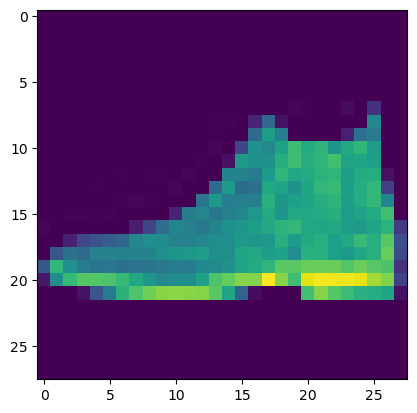

In [100]:
# This is some gibrish numbers but if we pick the maximum among a row we will get the predicted class let's try with index 0
y_probs[0].argmax(), class_names[y_probs[0].argmax()],plt.imshow(test_data_norm[0])

In [105]:
# Now let's do this for every element in the y_probs
y_preds = y_probs.argmax(axis=1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

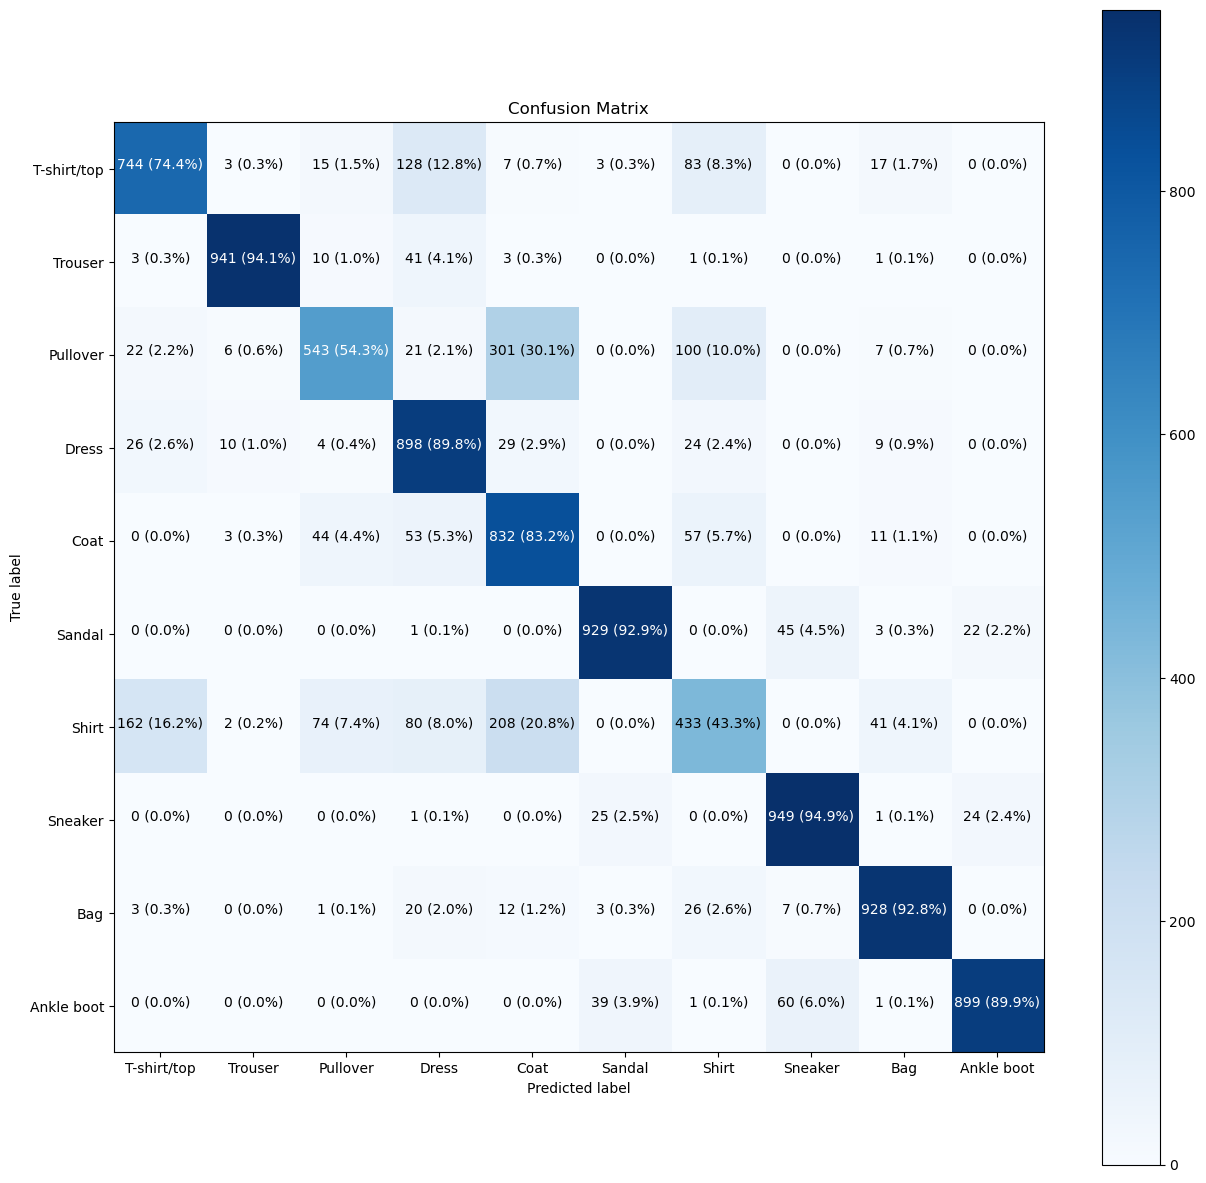

In [138]:
# Let's Create a function to display confusion matrix
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix
# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 15), text_size=10):
    
    """Makes a labelled confusion matrix comparing predictions and ground truth labels.

    If classes is passed, confusion matrix will be labelled, if not, integer class values
    will be used.

    Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

    Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.
    
    Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                      y_pred=y_preds, # predicted labels
                      classes=class_names, # array of class label names
                      figsize=(15, 15),
                      text_size=10)
    """  
    # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

    # Plot the figure and make it pretty
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)
    
    # Are there a list of classes?
    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
    

    # Label the axes
    ax.set(title="Confusion Matrix",
           xlabel="Predicted label",
           ylabel="True label",
           xticks=np.arange(n_classes), # create enough axis slots for each class
           yticks=np.arange(n_classes), 
           xticklabels=labels, # axes will labeled with class names (if they exist) or ints
           yticklabels=labels)
          
     # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    # Set the threshold for different colors
    threshold = (cm.max() + cm.min()) / 2
    
    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)
                
make_confusion_matrix(test_label,y_preds,class_names)

In [139]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  # Setup random integer
  i = random.randint(0, len(images))
  
  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

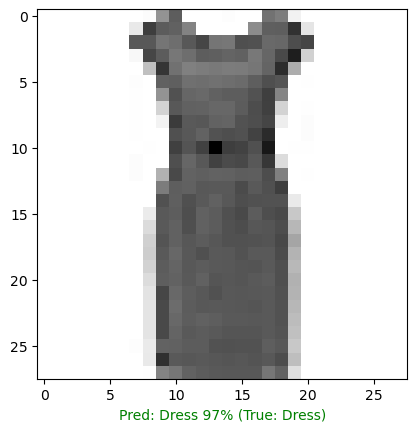

In [152]:
# Check out a random image as well as its prediction
plot_random_image(model=model_14, 
                  images=test_data, 
                  true_labels=test_label, 
                  classes=class_names)

# What patterns is our model learning?

In [154]:
model_14.layers

In [155]:
model_14.layers[1]

In [156]:
weights, biases = model_14.layers[1].get_weights()
weights,weights.shape

(array([[ 0.04192482, -0.39535722,  0.32160196,  3.1859348 ],
        [ 2.1571763 ,  3.828877  , -4.210187  ,  0.50444615],
        [ 0.8746018 ,  0.9405165 , -2.2901366 ,  3.9474547 ],
        ...,
        [ 1.9428906 ,  0.18850686, -0.32221347,  0.6554399 ],
        [ 1.7591642 ,  1.3681583 ,  0.5730189 , -0.39042506],
        [-0.668802  , -0.5400746 , -0.8539787 ,  1.5808392 ]],
       dtype=float32),
 (784, 4))

The weights matrix is the same shape as the input data, which in our case is 784 (28x28 pixels). And there's a copy of the weights matrix for each neuron the in the selected layer (our selected layer has 4 neurons)
These values start out as random numbers (they're set by the kernel_initializer parameter when creating a layer, the default is "glorot_uniform") and are then updated to better representative values of the data (non-random) by the neural network during training.



In [157]:
# Shape = 1 bias per neuron we have 4
biases,biases.shape

(array([5.5648236, 3.459788 , 4.2950397, 3.6793807], dtype=float32), (4,))

* Every neuron has a bias vector. Each of these is paired with a weight matrix. 
* The bias values get initialized as zeroes by default (using the bias_initializer parameter). 
* The bias vector dictates how much the patterns within the corresponding weights matrix should influence the next layer.

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [166]:
from keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
